<a href="https://colab.research.google.com/github/smpark0520/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD_%EA%B0%80%EC%9D%B4%EB%93%9C_%EA%B0%9C%EC%A0%952%ED%8C%90_ch8_4~5_p_509_534.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📝 텍스트 분류 개요

특정 문서의 분류 모델을 학습한 후, 새로운 문서의 분류를 예측하는 작업

텍스트 데이터를 정규화 → 피처 벡터화 → 머신러닝 모델 학습/예측/평가 순으로 진행

🛠️ 사용 기법
1. 피처 벡터화

- 카운트 기반 벡터화

- TF-IDF 기반 벡터화

2. 분류 알고리즘

- 로지스틱 회귀(Logistic Regression)

3. 성능 향상 기법

- GridSearchCV 기반 하이퍼파라미터 튜닝

- Pipeline을 활용한 피처 벡터화 + 모델 학습 최적화

🎯 목표

- 카운트 벡터화 vs TF-IDF 벡터화 성능 비교

- 하이퍼파라미터 튜닝을 통한 최적의 모델 찾기

- Pipeline 활용으로 효율적인 학습 및 최적화

## 텍스트 정규화

In [1]:
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset='all', random_state=156)

- news_data에 20개의 뉴스그룹 데이터를 불러옴

In [2]:
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [3]:
import pandas as pd

print("target 클래스의 값과 분포도 \n", pd.Series(news_data.target).value_counts().sort_index())
print("target 클래스의 이름들 \n", news_data.target_names)

target 클래스의 값과 분포도 
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
Name: count, dtype: int64
target 클래스의 이름들 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


- Target 클래스의 값은 0부터 19까지 20개로 구성

In [4]:
print(news_data.data[0])

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:
> 
> The question for the day is re: passenger helmets, if you don't know for 
>certain who's gonna ride with you (like say you meet them at a .... church 
>meeting, yeah, that's the ticket)... What are some guidelines? Should I just 
>pick up another shoei in my size to have a backup helmet (XL), or should I 
>maybe get an inexpensive one of a smaller size to accomodate my likely 
>passenger? 

If your primary concern is protecting the passenger in the event of a
crash, have him or her fitted for a helmet that is their size.  If your
primary concern is complying with stupid helmet laws, carry a real big
spare (you can put a big or small head in a big helmet, bu

## 📝 뉴스그룹 데이터 전처리  

### 🔹 헤더, 푸터, 이메일 정보 제거  
- 제목, 소속, 이메일 주소 등은 **Target 클래스 값과 유사한 데이터**를 포함할 가능성이 높음  
- 이를 포함하면 **예측 성능이 과도하게 높아질 위험**이 있음  
- 순수한 기사 내용만 활용하여 **정확한 텍스트 분류 수행**  

### 🔹`remove` 파라미터 활용  
- fetch_20newsgroups(remove=('headers', 'footers', 'quotes')) 로 불필요한 정보 제거

### 🔹`subset` 파라미터 활용

'train', 'test' 값을 설정해 학습 데이터와 테스트 데이터 분리 가능

In [5]:
from sklearn.datasets import fetch_20newsgroups

# 학습용 데이터만 추출 (내용만 포함)
train_news = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), random_state=156)
X_train = train_news.data
y_train = train_news.target

# 테스트 데이터만 추출 (내용만 포함)
test_news = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), random_state=156)
X_test = test_news.data
y_test = test_news.target

# 데이터 크기 출력
print('학습 데이터 크기: {0}, 테스트 데이터 크기: {1}'.format(len(X_train), len(X_test)))

학습 데이터 크기: 11314, 테스트 데이터 크기: 7532


## 📝 피처 벡터화 변환과 머신러닝 모델 학습/예측/평가  

1. **학습 데이터 피처 벡터화**  
   - **CountVectorizer**를 사용해 학습 데이터(11314개의 뉴스그룹 문서)의 텍스트를 **피처 벡터화**함.

2. **테스트 데이터 피처 벡터화 주의사항**  
   - 테스트 데이터(7532개의 문서)에 대해서도 **CountVectorizer**를 사용하지만, 반드시 **학습 데이터에 fit()한 객체**를 이용해 변환(transform)해야 함.
   - **학습 시 사용된 피처 개수**와 **테스트 데이터의 피처 개수**가 같아야 함.
   - **`fit_transform()`**을 테스트 데이터에 사용하면 안 되며, **`cnt_vect.transform()`**을 사용해야 함.

**중요**: 테스트 데이터에서 `fit_transform()`을 사용하면 **학습 시 설정된 피처 개수**와 **테스트 데이터에서 생성된 피처 개수**가 달라져 **예측 정확도에 영향을 미칠 수 있음**.


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorization으로 피처 벡터화 변환 수행.
cnt_vect = CountVectorizer()
cnt_vect.fit(X_train)
X_train_cnt_vect = cnt_vect.transform(X_train)

# 학습 데이터로 fit()된 CountVectorizer를 이용해 테스트 데이터를 피처 벡터화 변환 수행.
X_test_cnt_vect = cnt_vect.transform(X_test)

# 학습 데이터 텍스트의 CountVectorizer Shape 출력
print('학습 데이터 텍스트의 CountVectorizer Shape:', X_train_cnt_vect.shape)

학습 데이터 텍스트의 CountVectorizer Shape: (11314, 101631)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# LogisticRegression을 이용하여 학습/예측/평가 수행.
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_cnt_vect, y_train)

# 예측 수행
pred = lr_clf.predict(X_test_cnt_vect)

# 예측 정확도 출력
print('CountVectorized Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

CountVectorized Logistic Regression의 예측 정확도는 0.617


- 피처 벡터화된 데이터에 로지스틱 회귀를 적용해 뉴스그룹에 대한 분류를 예측

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# TF-IDF 벡터화를 적용해 학습 데이터 세트와 테스트 데이터 세트 변환.
tfidf_vect = TfidfVectorizer()  # 'TfidfVectorizerO'에서 'O' 삭제
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

# LogisticRegression을 이용해 학습/예측/평가 수행.
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_tfidf_vect, y_train)

# 예측 수행
pred = lr_clf.predict(X_test_tfidf_vect)

# 예측 정확도 출력
print('TF-IDF Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

TF-IDF Logistic Regression의 예측 정확도는 0.678


- Count 기반에서 TF-IDF 기반으로 벡터화를 변경해 예측 모델을 수행

- TF-IDF가 단순 카운트 기반보다 훨씬 높은 예측 정확도를 제공
- 일반적으로 문서 내에 텍스트가 많고 많은 문서를 가지는 텍스트 분석에서 카운트 벡터화보다는 TF-IDF 벡터화가 좋은 예측 결과를 도출

## 📝 텍스트 분석에서 머신러닝 성능 향상 방법
1. 중요한 2가지 방법

- 최적의 ML 알고리즘 선택

- 최상의 피처 전처리 수행

2. 피처 벡터화의 중요성

- 텍스트 정규화나 Count/TF-IDF 기반 피처 벡터화가 머신러닝 성능에 큰 영향을 미침

3. TF-IDF 벡터화 파라미터 조정

- 기존 파라미터: 기본 파라미터로 적용

- 변경된 파라미터:

 - 스톱 워드: None → english

 - n-gram range: (1, 1) → (1, 2)

 - max_df: 기본값 → 300

- 목표 : 변경된 파라미터로 예측 성능을 다시 측정

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# stop words 필터링을 추가하고 ngram을 기본 (1, 1)에서 (1, 2)로 변경해 피처 벡터화 적용.
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=300)
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

# LogisticRegression을 이용해 학습/예측/평가 수행.
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_tfidf_vect, y_train)

# 예측 수행
pred = lr_clf.predict(X_test_tfidf_vect)

# 예측 정확도 출력
print('TF-IDF Vectorized Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

TF-IDF Vectorized Logistic Regression의 예측 정확도는 0.690


- GridSearchCV를 이용해 로지스틱 회귀의 하이퍼 파라미터 최적화를 수행
- 로지스틱 회귀의 C 파라미터만 변경하면서 최적의 C값을 찾은 뒤 이 C값으로 학습된 모델에서 테스트 데이터로 예측해 성능을 평가

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 최적 C 값 도출 튜닝 수행. CV는 3 폴드 세트로 설정.
params = {'C': [0.01, 0.1, 1, 5, 10]}  # 잘못된 문법 수정
grid_cv_lr = GridSearchCV(lr_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)  # verbose=1 수정

grid_cv_lr.fit(X_train_tfidf_vect, y_train)

# 최적 C 값으로 학습된 grid_cv로 예측 및 정확도 평가.
print('Logistic Regression best C parameter:', grid_cv_lr.best_params_)
pred = grid_cv_lr.predict(X_test_tfidf_vect)

# 예측 정확도 출력
print('TF-IDF Vectorized Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Logistic Regression best C parameter: {'C': 10}
TF-IDF Vectorized Logistic Regression의 예측 정확도는 0.704


- 로지스틱 회귀의 C가 10일 때 GridSearchCV의 교차 검증 테스트 세트에서 가장 좋은 예측 성능을 나타냄

## 📝 사이킷런 파이프라인(Pipeline) 사용 및 GridSearchCV 결합

1. 사이킷런 파이프라인(Pipeline)

- 데이터 전처리와 머신러닝 알고리즘 학습/예측을 한 번에 처리할 수 있는 클래스

- 데이터 가공, 변환, 알고리즘 적용 등을 스트림 기반으로 처리

- 코드의 직관성 증가 및 데이터 처리 효율화

2. 장점

- 전처리와 학습을 통일된 API로 처리

- 대용량 데이터를 별도로 저장하지 않고 스트림 기반으로 처리하여 수행 시간 절약

3. 적용 예시

- 텍스트 기반 피처 벡터화뿐만 아니라 스케일링, PCA와 같은 전처리 작업 및 분류, 회귀 등의 Estimator를 한 번에 결합

4. 활용

- GridSearchCV와 결합하여 하이퍼파라미터 튜닝과 모델 학습/평가를 한 번에 수행 가능

In [12]:
from sklearn.pipeline import Pipeline

# Pipeline을 이용한 텍스트 분류 모델 정의
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),  # TF-IDF 벡터화
    ('lr_clf', LogisticRegression(random_state=156))  # 로지스틱 회귀 모델
])

1. 파이프라인 구성

- TfidfVectorizer 객체 (tfidf_vect)와 LogisticRegression 객체 (lr_clf)를 각각 변수명으로 생성한 후, 이들을 파이프라인 객체 (pipeline)로 연결

2. 전체 과정 통합

- 기존에 fit()과 transform()을 각각 호출하던 과정을 **pipeline.fit()**과 **pipeline.predict()**로 통합하여 피처 벡터화와 모델 학습/예측을 한번에 처리

3. 장점

- 머신러닝 코드를 더 직관적이고 간단하게 작성할 수 있어, 효율적이고 유지보수가 쉬운 코드 작성이 가능

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# TfidfVectorizer 객체를 tfidf_vect로, LogisticRegression 객체를 lr_clf로 생성하는 Pipeline 생성
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=300)),  # TfidfVectorizer 설정
    ('lr_clf', LogisticRegression(solver='liblinear', C=10))  # LogisticRegression 설정
])

In [14]:
from sklearn.metrics import accuracy_score

# pipeline의 fit( )과 predict( )만으로 한꺼번에 피처 벡터화와 ML 학습/예측이 가능
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)

# 예측 정확도 출력
print('Pipeline을 통한 Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

Pipeline을 통한 Logistic Regression의 예측 정확도는 0.704


- `GridSearchCV`는 `Pipeline`을 입력받아 피처 벡터화와 머신러닝 알고리즘의 하이퍼 파라미터를 동시에 최적화
- 파라미터는 `__`로 구별 (`'tfidf_vect__ngram_range'` 등)
- 많은 파라미터 튜닝 시 시간이 오래 걸림 (예: 81번 학습에 24분 소요)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# Pipeline 객체 생성
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression())
])

# 하이퍼 파라미터 설정
params = {
    'tfidf_vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'tfidf_vect__max_df': [100, 300, 700],
    'lr_clf__C': [1, 5, 10]
}

# GridSearchCV 객체 생성 및 학습
# grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3, scoring='accuracy', verbose=1)
# grid_cv_pipe.fit(X_train, y_train)

# 최적 하이퍼 파라미터 출력
# print(grid_cv_pipe.best_params_, grid_cv_pipe.best_score_)

# 예측 및 정확도 평가
# pred = grid_cv_pipe.predict(X_test)
# print('Pipeline을 통한 Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

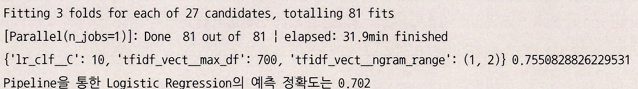

- 최적화된 파라미터: TfidfVectorizer의 max_df=700, ngram_range=(1, 2)와 LogisticRegression의 C=10을 적용하여 가장 좋은 검증 세트 성능을 얻음

- 테스트 정확도: 최적화된 파라미터로 테스트 데이터 예측 시 정확도는 약 0.702로 크게 개선되지 않음

- 다른 알고리즘 추천: 로지스틱 회귀 외에도 **서포트 벡터머신(SVM)**과 나이브 베이즈(Naive Bayes) 알고리즘을 활용해 모델을 생성할 것을 권장

# 05 감성분석

- 목적: 문서의 감성(긍정/부정/기분)을 파악하여 소셜 미디어, 온라인 리뷰 등에서 활용

- 감성 지수: 긍정 감성 지수와 부정 감성 지수로 나누어 합산하여 감성을 결정

- 머신러닝 접근법:

지도학습: 학습 데이터와 레이블을 기반으로 감성 분석 모델 학습

비지도학습: 'Lexicon' 감성 어휘 사전을 이용해 문서의 감성을 판단

## 지도학습 기반 감성 분석 실습 - IMDB 영화평

In [19]:
import pandas as pd

review_df = pd.read_csv('/content/drive/MyDrive/labeledTrainData.tsv',header=0,sep="\t",quoting=3)
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


- id： 각데이터의 id

- sentiment： 영화평(review)의 Sentiment 결과 값(Target Label). 1은 긍정적 평가, 0은 부정적 평가를 의미
- review： 영화평의 텍스트

In [20]:
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

-` <br />` 태그 제거: str.replace()를 사용해 `<br />` 태그를 공백으로 변경.

- 숫자/특수문자 제거: 정규 표현식 re.sub(r'[^a-zA-Z]', ' ', x)를 사용해 영어 대/소문자가 아닌 모든 문자를 공백으로 변환.

- 적용 방법: re.sub()를 lambda 함수와 함께 pandas DataFrame에 적용하여 처리.

In [22]:
import re

# <br /> HTML 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />', ' ')

# 파이썬의 정규 표현식 모듈인 re를 이용해 영어 문자열이 아닌 문자는 모두 공백으로 변환
review_df['review'] = review_df['review'].apply(lambda x : re.sub("[^a-zA-Z]", " ", x))

- 결정 값 추출: sentiment 칼럼을 별도로 추출하여 결정 값 데이터 세트 생성

- 피처 데이터 세트 생성: 원본 데이터에서 id와 sentiment 칼럼을 삭제하여 피처 데이터 세트 생성

- 학습/테스트 데이터 분리: train_test_split()을 사용하여 학습용과 테스트용 데이터 세트로 분리

In [23]:
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']
feature_df = review_df.drop(['id','sentiment'],axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df, test_size=0.3, random_state=156)

X_train.shape, X_test.shape

((17500, 1), (7500, 1))

- 학습용 데이터는 17500개의 리뷰, 테스트용 데이터는 7500개의 리뷰로 구성

1. 피처 벡터화 및 분류 모델 적용:

- Count 벡터화: 감상평 텍스트를 Count 벡터화하여 예측 성능을 측정.

- TF-IDF 벡터화: 이후 TF-IDF 벡터화 적용하여 성능 비교.

2. 분류 알고리즘: Logistic Regression을 사용하여 이진 분류 수행.

3. 성능 평가:

- 정확도: 테스트 데이터 세트에서 정확도 측정.

- ROC-AUC: 분류 성능을 평가하기 위해 ROC-AUC도 측정.

- 감상평(Review) 텍스트를 피처 벡터화한 후에 ML 분류 알고리즘을 적용해 예측 성능을 측정

In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# 스톱 워드는 영어, ngram은 (1, 2)로 설정해 CountVectorization 수행.
# LogisticRegression의 C는 10으로 설정.
pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1,2))),
    ('lr_clf', LogisticRegression(C=10))])

# Pipeline 객체를 이용해 fit(), predict()로 학습/예측 수행. predict_proba()는 roc_auc
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

# 예측 정확도와 ROC-AUC 출력
print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(
    accuracy_score(y_test, pred),
    roc_auc_score(y_test, pred_probs)
))

예측 정확도는 0.8848, ROC-AUC는 0.9509


- TF-IDF 벡터화를 적용해 다시 예측 성능을 측정

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# 스톱 워드는 english, ngram은 (1, 2)로 설정해 TF-IDF 벡터화 수행.
# LogisticRegression의 C는 10으로 설정.
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1, 2))),
    ('lr_clf', LogisticRegression(solver='liblinear', C=10))
])

# Pipeline 객체를 이용해 fit(), predict()로 학습/예측 수행.
# predict_proba()는 roc_auc 때문에 수행.
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:, 1]

# 예측 정확도와 ROC-AUC 출력
print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(
    accuracy_score(y_test, pred),
    roc_auc_score(y_test, pred_probs)
))

예측 정확도는 0.8936, ROC-AUC는 0.9598


## 비지도학습 기반 감성 분석 소개

- 비지도 감성 분석: 레이블 없이 감성 사전(Lexicon) 사용, 감성 지수(긍정/부정)로 분석

- NLTK의 Lexicon 모듈: 감성 사전 제공

- WordNet: 단어의 시맨틱 분석, Synset(동의어 집합)으로 문맥 정보 제공

- NLTK 감성 사전: 예측 성능이 낮아 실제 업무에서는 다른 감성 사전 사용

- 주요 감성 사전:

 - SentiWordNet: WordNet 기반의 감성 단어 전용 사전, 긍정/부정/객관성 지수 제공

 - VADER: 소셜 미디어 텍스트 감성 분석, 빠른 수행 시간, 대용량 데이터 처리에 적합

 - Pattern: 뛰어난 예측 성능, 파이썬 2.X에서만 사용 가능

- VADER를 사용한 감성 분석이 추천되며, SentiWordNet은 예측 정확도가 낮아 잘 사용되지 않음

## SentiWordNet 을 이용한 감성 분석

- SentiWordNet: WordNet 기반의 감성 분석을 위한 사전

- Synset: WordNet의 핵심 개념으로, 단어의 의미와 문맥을 함께 제공

- 설정 과정: NLTK를 셋업하고 WordNet 서브패키지 및 데이터 세트를 다운로드해야 함

- SentiWordNet 사용: WordNet의 synset을 기반으로 감성 분석을 수행

In [27]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

- WordNet 모듈을 임포트해서 'present' 단어에 대한 Synset을 추출

In [28]:
from nltk.corpus import wordnet as wn

term='present'

# 'present'라는 단어로 wordnet의 synsets 생성
synsets = wn.synsets(term)
print('synsets() 반환 type:', type(synsets))
print('synsets() 반환 값 개수:', len(synsets))
print('synsets() 반환 값:', synsets)

synsets() 반환 type: <class 'list'>
synsets() 반환 값 개수: 18
synsets() 반환 값: [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


- 총 18개의 서로 다른 semantic을 가지는 synset 객체가 반환
- Synset 객체 예시: Synset('present.n.01')

 - present: 의미

 - n: 명사 품사(POS tag)

 - 01: 명사로서의 여러 의미 중 첫 번째 인덱스

- Synset 객체의 속성:

 - POS (Part of Speech): 품사를 나타냄 (예: 명사, 동사 등)

 - Definition: 해당 Synset의 정의(의미)

 - Lemma: 단어의 원형 형태, 즉 부명제

- synsets 리스트에 대해 각 synset의 정보를 출력하는 코드
- 각 synset의 이름, 품사(POS), 정의, 그리고 그와 관련된 부명제(Lemmas)를 출력

In [29]:
for synset in synsets :
  print('###Synset name:', synset.name(), '###')
  print('POS:', synset.lexname())
  print('Definition:', synset.definition())
  print('Lemmas:', synset.lemma_names())

###Synset name: present.n.01 ###
POS: noun.time
Definition: the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas: ['present', 'nowadays']
###Synset name: present.n.02 ###
POS: noun.possession
Definition: something presented as a gift
Lemmas: ['present']
###Synset name: present.n.03 ###
POS: noun.communication
Definition: a verb tense that expresses actions or states at the time of speaking
Lemmas: ['present', 'present_tense']
###Synset name: show.v.01 ###
POS: verb.perception
Definition: give an exhibition of to an interested audience
Lemmas: ['show', 'demo', 'exhibit', 'present', 'demonstrate']
###Synset name: present.v.02 ###
POS: verb.communication
Definition: bring forward and present to the mind
Lemmas: ['present', 'represent', 'lay_out']
###Synset name: stage.v.01 ###
POS: verb.creation
Definition: perform (a play), especially on a stage
Lemmas: ['stage', 'present', 'represent']
###Synset name: present.v.04 ###
POS: verb.p

- Synset('present.n.01')과 Synset('present.n.02')는 둘 다 명사(POS: noun)지만, 서로 다른 의미를 가짐

 - Synset('present.n.01'): POS는 noun.time으로, 정의는 '시간적인 의미로 현재'를 나타냄

 - Synset('present.n.02'): POS는 noun.possession으로, 정의는 '선물'을 의미

- Synset('show.v.01'): 동사(POS: verb.perception)로, 정의는 '관객에게 전시물 등을 보여주다'라는 뜻

- synset 객체는 path_similarity() 메서드를 사용해 단어 간 유사도를 계산

- 유사도는 두 단어 간 최단 경로 기반, 1에 가까울수록 유사

- 예시: 'tree', 'lion', 'tiger', 'cat', 'dog' 단어의 상호 유사도 계산

In [32]:
# synset 객체를 단어별로 생성합니다.
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree, lion, tiger, cat, dog]

# 유사도를 저장할 리스트와 단어 이름 리스트를 생성합니다.
similarities = []
entity_names = [entity.name().split('.')[0] for entity in entities]

# 단어별 synset을 반복하면서 다른 단어의 synset과 유사도를 측정합니다.
for entity in entities:
    similarity = [round(entity.path_similarity(compared_entity), 2)
                  for compared_entity in entities]
    similarities.append(similarity)

# 개별 단어별 synset과 다른 단어의 synset과의 유사도를 DataFrame 형태로 저장합니다.
similarity_df = pd.DataFrame(similarities, columns=entity_names, index=entity_names)
similarity_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


- lion은 tree와의 유사도가 0.07로 가장 적고,
tiger와는 유사도가 0.33으로 가장 큼

- SentiWordNet은 Senti_Synset 클래스를 제공

- senti_synsets()는 Senti_Synset 객체를 리스트로 반환

In [34]:
import nltk
from nltk.corpus import sentiwordnet as sentiwordnet

senti_synsets = list(sentiwordnet.senti_synsets('slow'))
print('senti_synsets() 반환 type:', type(senti_synsets))
print('senti_synsets() 반환 값 개수:', len(senti_synsets))
print('senti_synsets() 반환 값:', senti_synsets)

senti_synsets() 반환 type: <class 'list'>
senti_synsets() 반환 값 개수: 11
senti_synsets() 반환 값: [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


- SentiSynset 객체는 감성 지수와 객관성 지수를 가짐

- 감성 지수는 긍정 감성 지수와 부정 감성 지수로 나뉨

- 객관성 지수는 감성적이지 않으면 1이 되고, 감성 지수는 0이 됨

In [37]:
import nltk
from nltk.corpus import sentiwordnet as swn

father = swn.senti_synset('father.n.01')
print('father 긍정감성 지수:', father.pos_score())
print('father 부정감성 지수:', father.neg_score())
print('father 객관성 지수:', father.obj_score)
print('\n')
fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수:', fabulous.pos_score())
print('fabilous 부정감성 지수:', fabulous.neg_score)

father 긍정감성 지수: 0.0
father 부정감성 지수: 0.0
father 객관성 지수: <bound method SentiSynset.obj_score of SentiSynset('father.n.01')>


fabulous 긍정감성 지수: 0.875
fabilous 부정감성 지수: <bound method SentiSynset.neg_score of SentiSynset('fabulous.s.01')>


- father: 객관적인 단어로 객관성 지수 1.0, 긍정/부정 감성 지수 모두 0

- fabulous: 감성 단어로 긍정 감성 지수 0.875, 부정 감성 지수 0.125

SentiWordNet을 이용한 영화 감상평 감성 분석 순서:

1. 문서를 문장 단위로 분해

2. 문장을 단어 단위로 토큰화하고 품사 태깅

3. 품사 태깅된 단어로 synset 객체와 senti_synset 객체 생성

4. senti_synset 객체에서 긍정 감성/부정 감성 지수 합산 후 임계치로 감성 판단

주요 처리 과정:

- 품사 태깅: 내부 함수를 생성하여 품사 태깅 수행

- 어근 추출 (Lemmatization): 단어의 기본형 추출

- SentiSynset 사용: 긍정/부정 감성 지수를 기반으로 감성 판단

In [41]:
from nltk.corpus import wordnet as wn

# 간단한 NTLK PennTreebank Tag를 기반으로 WordNet 기반의 품사 Tag로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB

- 문서 → 문장 단위 분해

- 문장 → 단어 토큰화 및 품사 태깅

- SentiSynset 생성

- 긍정/부정 감성 지수 합산

- 합산된 감성 지수로 긍정/부정 예측

In [43]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.corpus import wordnet as wn

# NLTK PennTreebank Tag를 WordNet 품사 태그로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB

# SentiWordNet을 이용한 감성 지수 계산 함수
def swn_polarity(text):
    sentiment = 0.0  # 감성 지수 초기화
    lemmatizer = WordNetLemmatizer()

    raw_sentences = sent_tokenize(text)  # 문장 단위로 분리

    # 문장별로 처리
    for raw_sentence in raw_sentences:
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))  # 품사 태깅
        for word, tag in tagged_sentence:
            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue  # 명사, 형용사, 부사만 처리
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            synsets = wn.synsets(lemma, pos=wn_tag)  # Synset 객체 생성
            if not synsets:
                continue
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())  # SentiWordNet의 감성 synset 추출
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())  # 감성 지수 계산

    # 총 합산된 감성 지수가 0 이상이면 긍정(Positive), 그렇지 않으면 부정(Negative)
    if sentiment >= 0:
        return 1  # 긍정
    return 0  # 부정

- swn_polarity(text) 함수를 review_df의 각 감상평에 적용하여 긍정/부정 감성을 예측

- apply(lambda x: swn_polarity(x))로 precis 칼럼에 감성 분석 결과 저장

- 실제 감성(sentiment)과 예측 결과(precis)를 비교하여 정확도, 정밀도, 재현율 계산

In [44]:
review_df['preds'] = review_df['review'].apply(lambda x : swn_polarity(x))
y_target = review_df['sentiment'].values
preds = review_df['preds'].values

- SentiWordNet의 감성 분석 예측 성능

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np
print(confusion_matrix(y_target, preds))
print("정활도:", np.round(accuracy_score(y_target, preds), 4))
print("정밀도:", np.round(precision_score(y_target, preds), 4))
print("재현율:", np.round(recall_score(y_target, preds), 4))

[[7669 4831]
 [3635 8865]]
정활도: 0.6614
정밀도: 0.6473
재현율: 0.7092


## VADER 를이용한 감성분석

- VADER는 소셜 미디어 감성 분석을 위한 룰 기반 Lexicon.

- NLTK 서브 모듈 또는 별도 패키지(vaderSentiment)로 설치 가능.

- SentimentIntensityAnalyzer 클래스를 사용해 감성 분석 수행.

- 예시로 IMDB 감상평 하나에 대해 감성 분석 후 결과 확인

In [46]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# VADER를 사용하여 첫 번째 IMDB 리뷰(review_df['review'][0])에 대한 감성 분석 수행
senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0])
print(senti_scores)

{'neg': 0.13, 'neu': 0.743, 'pos': 0.127, 'compound': -0.7943}


pos: 긍정적인 감성 점수

neu: 중립적인 감성 점수

neg: 부정적인 감성 점수

compound: 종합적인 감성 점수 (긍정, 부정, 중립을 종합한 지표)

- VADER를 사용한 감성 분석 :

 - SentimentIntensityAnalyzer 객체를 생성하고, polarity_scores() 메서드로 감성 점수를 구함

 - 반환되는 감성 점수는 neg, neu, pos, compound의 네 가지 값

 - compound 값으로 감성 판단:

   - compound 값이 0.1 이상이면 긍정 감성, 그 이하이면 부정 감성으로 예측

- 임계값은 상황에 따라 조정하여 예측 성능을 최적화할 수 있음

VADER를 이용한 IMDB 감성 분석:

- vader_polarity() 함수:

 - 입력 파라미터: 영화 감상평 텍스트, 긍정/부정 임계값(threshold)

 - SentimentIntensityAnalyzer의 polarity_scores() 메서드를 사용하여 감성 점수를 계산하고, 그 결과를 기준으로 긍정/부정을 판단

- 분석 과정:

1. apply(lambda x: vader_polarity(x))를 사용하여 review_df DataFrame의 각 영화 감상평에 대해 감성 분석 수행

2. 결과는 vader_preds라는 새로운 칼럼에 저장

3. 저장된 감성 분석 결과를 이용해 VADER의 예측 성능을 평가

In [48]:
def vader_polarity(review, threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    # compound 값에 기반해 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

# review_df에 감성 분석 결과를 'vader_preds' 칼럼으로 저장
review_df['vader_preds'] = review_df['review'].apply(lambda x: vader_polarity(x, threshold=0.1))

# 실제 값과 예측값 추출
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

# 혼동 행렬 및 성능 평가 출력
print(confusion_matrix(y_target, vader_preds))
print("정확도:", np.round(accuracy_score(y_target, vader_preds), 4))
print("정밀도:", np.round(precision_score(y_target, vader_preds), 4))
print("재현율:", np.round(recall_score(y_target, vader_preds), 4))

[[ 6747  5753]
 [ 1858 10642]]
정확도: 0.6956
정밀도: 0.6491
재현율: 0.8514


- 정확도가 SentiWordNet보다 향상됐고, 특히 재현율은 약 85.14%로 매우 크게 향상

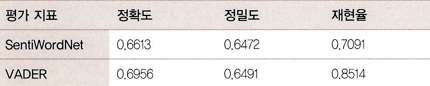